**Problem Definition:**

Yulu, a prominent micro-mobility service provider in India, has observed a substantial decline in revenues. With a mission to alleviate traffic congestion, Yulu offers unique vehicles for daily commuting, facilitated by strategically located zones at metro stations, bus stands, offices, residential areas, and corporate spaces.

In response to the revenue downturn, Yulu has engaged a consulting company to identify the key factors influencing the demand for their shared electric cycles in the Indian market. The primary objectives are to determine:

**Significant Variables:** Identify the variables that play a crucial role in predicting the demand for shared electric cycles.

**Descriptive Power:** Assess how well these variables collectively describe and explain the variations in electric cycle demand in the Indian market.

By addressing these questions, the consulting company aims to provide Yulu with actionable insights, enabling them to optimize their micro-mobility service and regain market traction.

In [34]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [35]:
# loading data
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [36]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Summary of the attributes in dataset:**

**datetime**: Data type is datetime.

**season**: Categorical variable with values 1, 2, 3, and 4 representing spring, summer, fall, and winter, respectively.

**holiday:** Binary variable indicating whether the day is a holiday (1 for yes, 0 for no).

**workingday:** Binary variable indicating whether the day is a working day (1 for yes, 0 for no).

**weather:** Categorical variable with values 1, 2, 3, and 4 representing different weather conditions.
* Clear, Few clouds, partly cloudy, partly cloudy

* Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp:** Numeric variable representing temperature in Celsius.

**atemp:** Numeric variable representing feeling temperature in Celsius.

**humidity:** Numeric variable representing humidity.

**windspeed:** Numeric variable representing wind speed.

**casual:** Count of casual users.

**registered:** Count of registered users.

**count:** Total count of rental bikes, including both casual and registered users.

In [37]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of all attributes
print("\nData Types of Attributes:")
print(df.dtypes)

# Convert categorical attributes to 'category' type
categorical_attributes = ['season', 'holiday', 'workingday', 'weather']
df[categorical_attributes] = df[categorical_attributes].astype('category')

# Convert 'datetime' to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Verify the changes in data types after conversion
print("\nUpdated Data Types of Attributes:")
print(df.dtypes)

Shape of the DataFrame: (10886, 12)

Data Types of Attributes:
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

Updated Data Types of Attributes:
datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [38]:
# Missing value detection
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [39]:
any_duplicates = any(df.duplicated())
print(any_duplicates)

False


In [40]:
# Statistical summary
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [41]:
df.describe(include='category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [42]:
df['datetime'].max() - df['datetime'].min()  # total time period

Timedelta('718 days 23:00:00')

#**Key Findings and Analysis:**

##**Numeric Variables (Temperature, Feeling Temperature, Humidity, Windspeed, Counts):**
**Temperature and Feeling Temperature:**

* The average temperature is approximately 20.23°C, ranging from 0.82°C to 41.00°C.
* The average feeling temperature is around 23.66°C, ranging from 0.76°C to 45.46°C.
* The majority of temperature and feeling temperature values fall within the interquartile range (25th to 75th percentile).

**Humidity:**

* The average humidity is approximately 61.89%, ranging from 0% to 100%.
* The majority of humidity values fall within the interquartile range.

**Windspeed:**

* The average windspeed is approximately 12.80 units, ranging from 0 to 56.99 units.
* The majority of windspeed values fall within the interquartile range.

**Counts (Casual, Registered, Total):**

* The average count of casual users is approximately 36.02, with a maximum of 367.
* The average count of registered users is approximately 155.55, with a maximum of 886.
* The average total count (casual + registered) is approximately 191.57, with a maximum of 977.

##**Categorical Variables (Season, Holiday, Working Day, Weather):**

**Seasonal Distribution:**

* The dataset is well-distributed across all four seasons (spring, summer, fall, winter).

* Most data points are recorded in season 4 (winter).

**Holiday and Working Day Impact:**

* Very few data points are recorded for holidays.
* Working days (1) are more prevalent than non-working days (0).

**Weather Impact:**

* Four weather types are present: 1 (Clear or Few Clouds), 2 (Mist or Cloudy), 3 (Light Snow or Rain), 4 (Heavy Rain or Snow).

* Most data points occur in weather type 1 (Clear or Few Clouds), suggesting a preference for renting bikes during clear weather conditions.

**Time Duration:**
* The dataset covers a time period of approximately 718 days and 23 hours.

**Summary:**
* Seasonal Patterns: Well-distributed data across all seasons, with winter having the most entries.
* Holiday and Working Day Impact: Very few data points for holidays, and working days dominate the dataset.
* Weather Influence: Clear or Few Clouds weather conditions attract the most bike rentals.
* Temperature and Windspeed: Moderate variability in temperature and windspeed, with no extreme outliers.
* User Demographics: Registered users contribute significantly more to bike rentals compared to casual users.
* Time Duration: The dataset spans a substantial period, providing a diverse range for analysis.

In [43]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

for col in categorical_columns:
    print(f"Normalized value counts for {col}:")
    print(df[col].value_counts(normalize=True))
    print()

Normalized value counts for season:
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

Normalized value counts for holiday:
0    0.971431
1    0.028569
Name: holiday, dtype: float64

Normalized value counts for workingday:
1    0.680875
0    0.319125
Name: workingday, dtype: float64

Normalized value counts for weather:
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64



#**Analysis of Normalized Value Counts:**
**Season:**
* The dataset is relatively evenly distributed across the four seasons.
* Winter (season 4) and Summer (season 2 and 3) have slightly higher occurrences, each around 25% of the total observations.
* Spring (season 1) has a slightly lower occurrence at approximately 24.67%.

**Holiday:**
* The majority of observations (97.14%) are non-holiday days (holiday=0).
* Holidays are infrequent, constituting only 2.86% of the total observations.

**Working Day:**
* Working days (workingday=1) make up the majority of observations, accounting for 68.09%.
* Non-working days (workingday=0) are less frequent, comprising 31.91% of the total observations.

**Weather:**
* The dataset is mostly associated with weather type 1 (Clear or Few Clouds), representing 66.07% of the total observations.
* Weather type 2 (Mist or Cloudy) is the next most common, accounting for 26.03%.
* Weather type 3 (Light Snow or Rain) is less common, with a frequency of 7.89%.
* Weather type 4 (Heavy Rain or Snow) is extremely rare, making up only 0.01% of the total observations.

**Summary:**

The dataset exhibits a diverse distribution across seasons, with a noticeable prevalence of non-holidays, working days, and clear weather conditions. This information provides insights into the categorical characteristics of the data, offering a foundation for understanding the contextual factors influencing bike rentals.

In [44]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


**Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)**

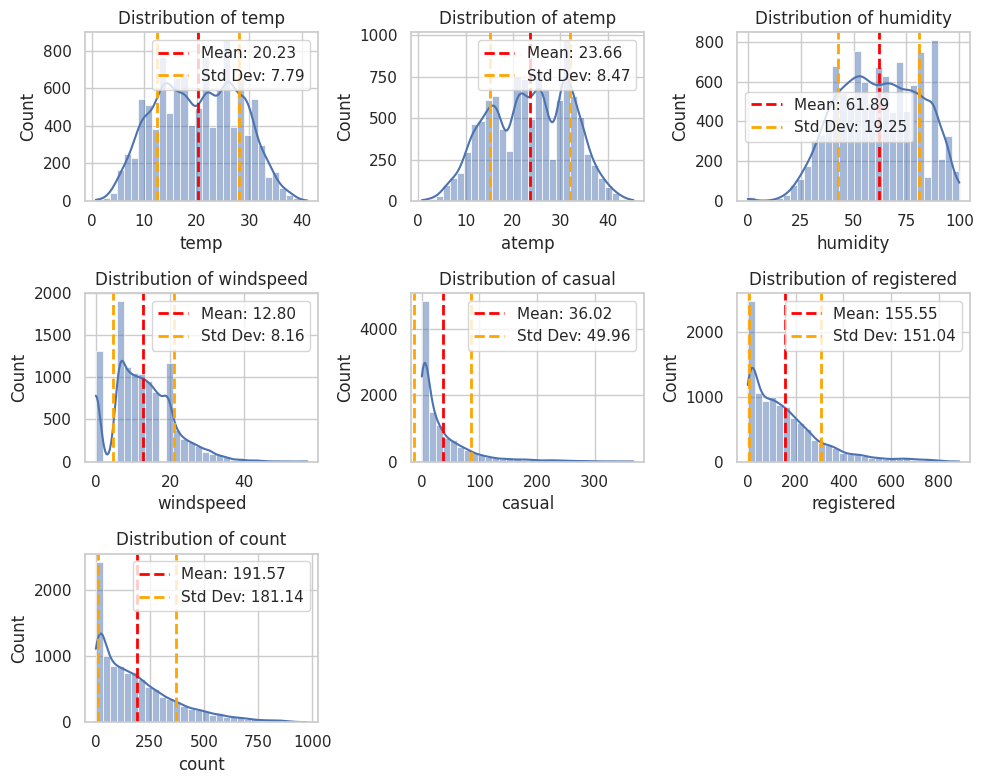

In [45]:
# Set style for seaborn plots
sns.set(style="whitegrid")

# Continuous Variables: Distribution Plots with Annotations
continuous_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(10, 8))
for i, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df[column].mean():.2f}')
    plt.axvline(df[column].mean() + df[column].std(), color='orange', linestyle='dashed', linewidth=2,
                label=f'Std Dev: {df[column].std():.2f}')
    plt.axvline(df[column].mean() - df[column].std(), color='orange', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution of {column}')
    plt.legend()

plt.tight_layout()
plt.show()

**Analysis**

* The mean temperature observed is 20.23 degrees Celsius, with temperature ranging from a minimum of 0.82 to a maximum of 41 degrees Celsius. In terms of perceived temperature, the average is noted at 23.66 degrees Celsius, with a range between 0.76 and 45.45 degrees Celsius.

* Examining humidity levels, the graph exhibits a slight left skewness, showcasing a maximum humidity of 100. On average, the humidity stands at 61.89.

* The distribution of windspeed displays a right-skewed pattern, with an average windspeed of 12.8. The dataset captures a broad spectrum, with windspeed varying from a minimum of 0 to a maximum of 56.996. Notably, instances of zero windspeed predominate.


* The distribution of casual users reveals a pronounced right-skewed trend, with a considerable concentration at zero. The mean count of casual users is 36.02, with the maximum reaching 367 and a minimum of zero.

* Similarly, the graph for registered users leans towards the right, indicating a right-skewed distribution. The average count of registered users is 155.55, ranging from zero to a maximum of 886.

* As the count represents the sum of registered and casual users, the overall graph displays a right-skewed pattern. The majority of instances have zero counts, while the average count is approximately 191.57.

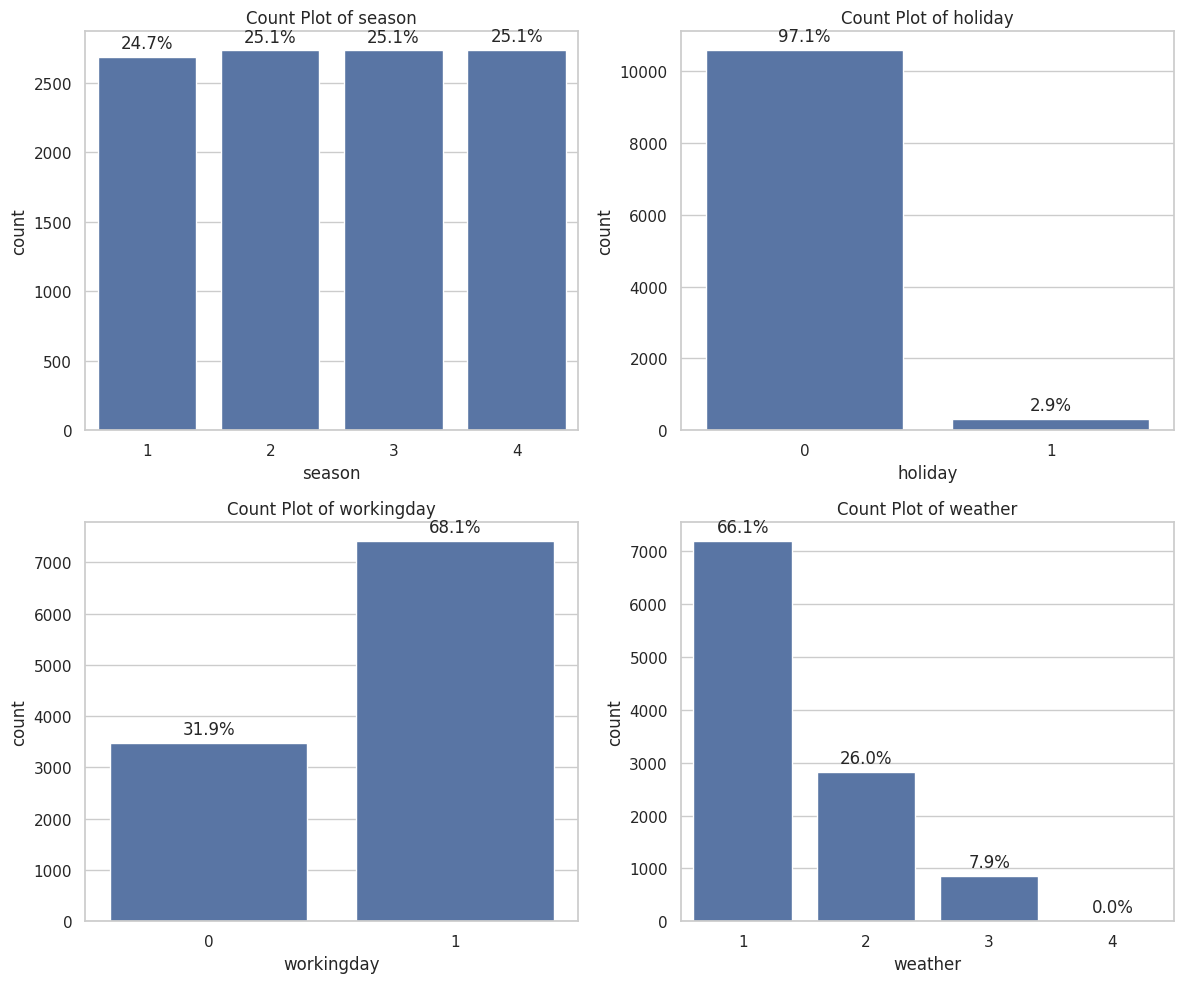

In [46]:
# Categorical Variables: Countplots
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(12, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=df[column])
    plt.title(f'Count Plot of {column}')

    total_count = len(df[column])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


**Analysis**

* The distribution across seasons appears to be relatively uniform, suggesting an equitable representation of each season in the dataset.

* There is a noticeable imbalance in the holiday classes, indicating a lower utilization of vehicles on holidays, which is a plausible observation.

* A significant imbalance is observed in the working-day classes, implying a higher usage of vehicles on regular workdays.

* Approximately 66% of the data points correspond to clear skies or partly cloudy conditions, while mist or cloudy weather accounts for around 26% of the dataset.

* Limited data points are recorded during light snow or light rain conditions, possibly indicating decreased service usage during adverse weather such as heavy rain or thunderstorms, which aligns with common expectations.

**Bivariate Analysis**

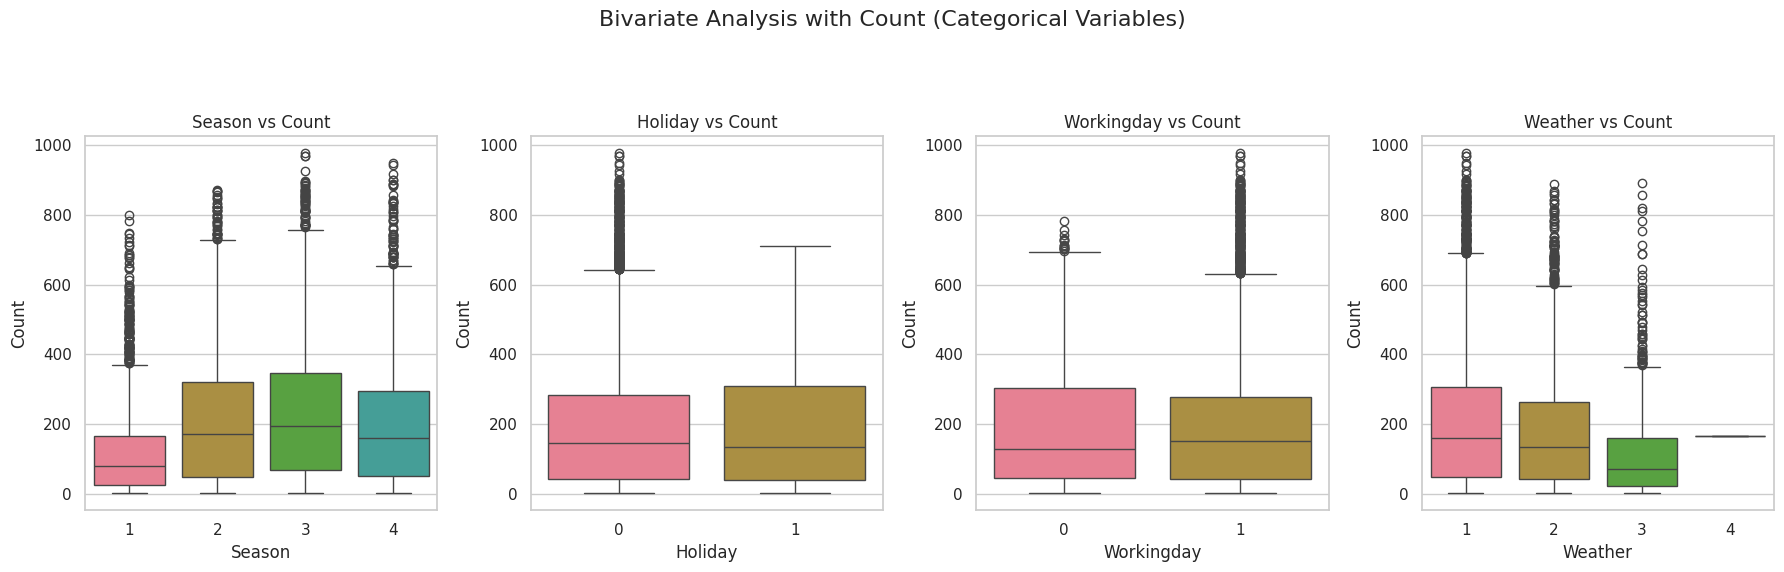

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a  color palette
colors = sns.color_palette("husl")

# Selecting categorical variables for bivariate analysis
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(18, 6))
fig.suptitle('Bivariate Analysis with Count (Categorical Variables)', fontsize=16)

# Plotting box plots for categorical variables
for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='count', data=df, ax=axes[i], palette=colors)
    axes[i].set_title(f'{var.capitalize()} vs Count')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

**Observations**

**Season:**
The median demand remains consistent in summer, fall, and winter seasons, with a notably lower median observed in the spring season. Outliers in demand are evident across all seasons, particularly in the upper range of the Interquartile Range (IQR), suggesting potential anomalies, especially in the spring.

**Holiday:**
The median demand shows minimal variation between holidays and non-holidays. Notably, there are no outliers in demand during holidays, while outliers in demand are present during non-holidays, predominantly in the upper IQR.

**Workingday:**
The median difference between working and non-working days is only marginally significant. Outliers in vehicle demand are observed on both working and non-working days, indicating sporadic deviations from the norm.

**Weather:**
For clear/few clouds and misty/cloudy conditions, the median demand for vehicles remains consistent. However, during light snow/light rain, the demand is lower compared to clear and misty conditions. Limited data points are available for heavy rain and thunderstorms, aligning with expectations. Outliers, mostly in the upper IQR, are observed across all conditions except heavy rain.

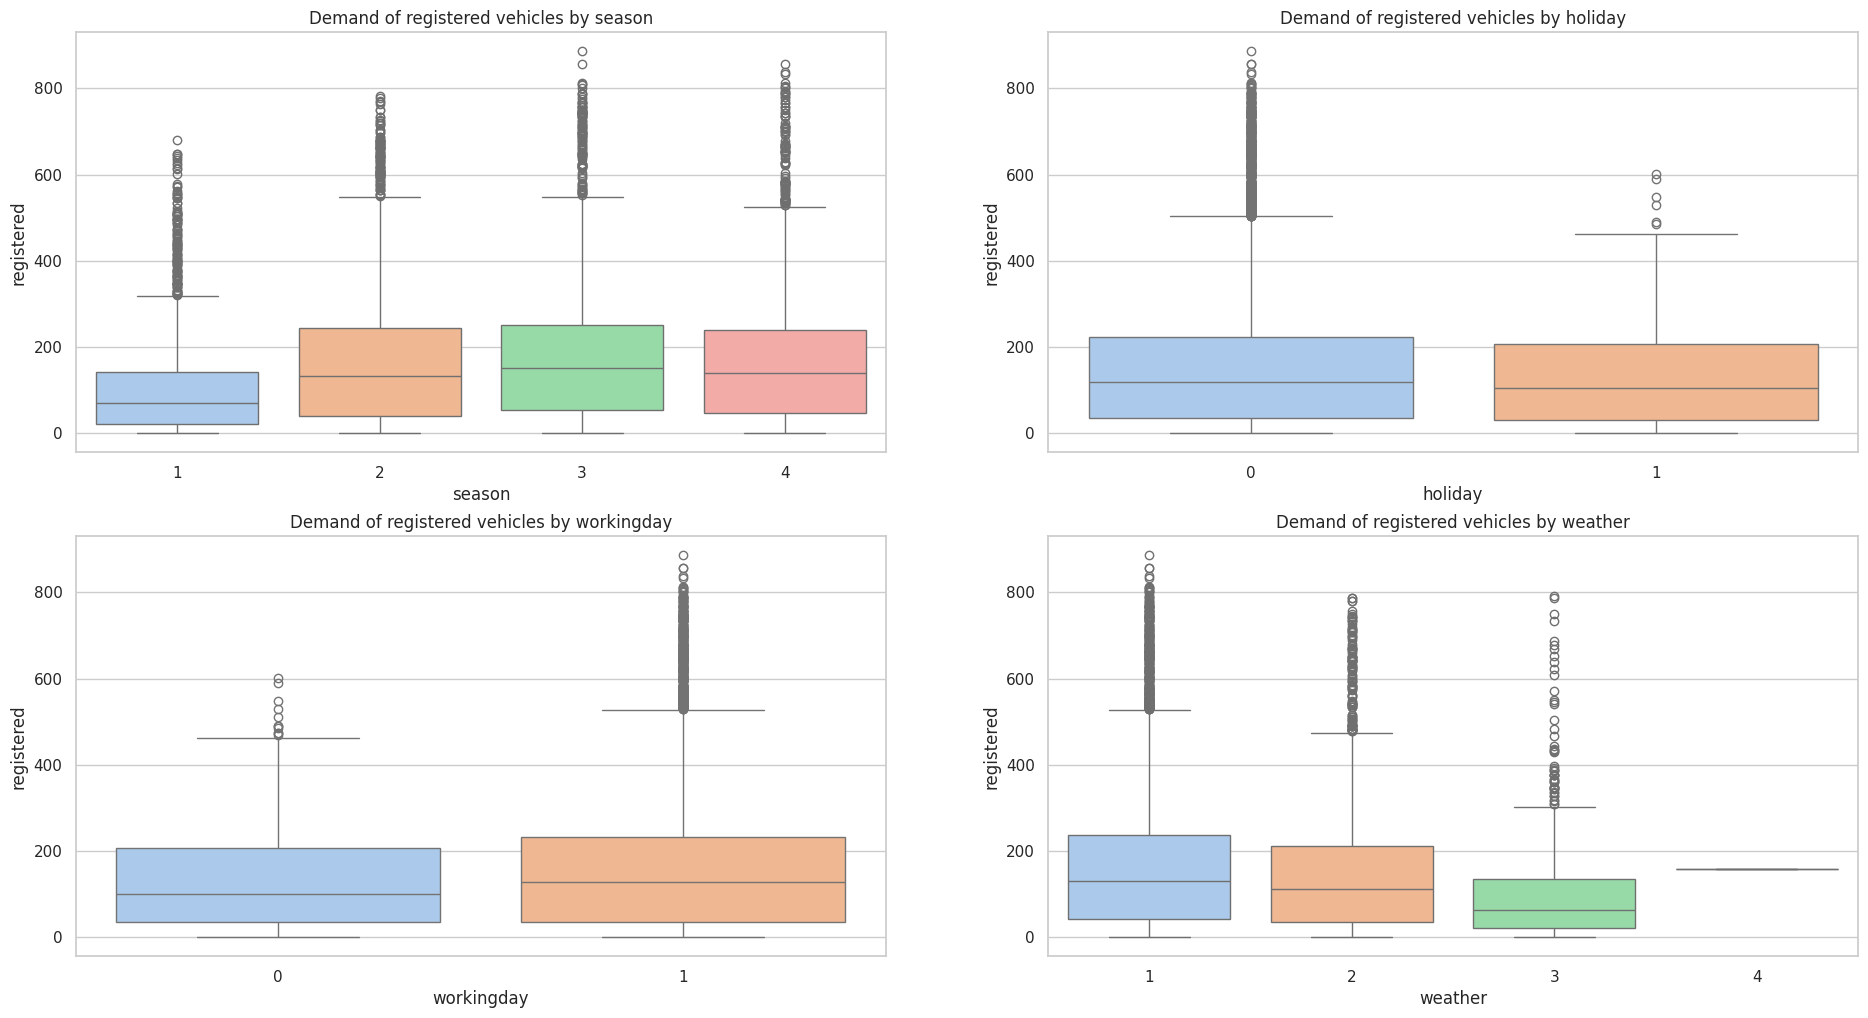

In [48]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

# Using a pastel color palette
pastel_palette = sns.color_palette("pastel")

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

for index, column in enumerate(categorical_columns):
    sns.boxplot(data=df, x=column, y="registered", palette=pastel_palette, ax=axes[index])
    axes[index].set_title(f"Demand of registered vehicles by {column}")

plt.show()

**Analysis**

**Season vs. Registered Demand:**

* The median registered vehicle demand is relatively consistent across summer, fall, and winter seasons.
* However, the spring season exhibits lower median demand, suggesting a potential seasonal influence on registered vehicle usage.
* Outliers in all seasons, particularly in spring, indicate unusual demand patterns.

**Holiday vs. Registered Demand:**

* There is little difference in median registered vehicle demand between holidays and non-holidays.
* Notably, outliers in non-holiday demand suggest sporadic instances of increased registered vehicle usage on regular days.

**Workingday vs. Registered Demand:**

* The median difference in registered vehicle demand between working and non-working days is marginal.
* Outliers on both working and non-working days hint at occasional peaks in registered vehicle demand.

**Weather vs. Registered Demand:**

* The median registered vehicle demand remains comparable for clear/few clouds and misty/cloudy conditions.
* Lower median demand is observed during light snow/light rain conditions, aligning with the expectation of decreased usage in adverse weather.
* Outliers in various weather conditions highlight instances of extreme registered vehicle demand.

In summary, registered vehicle demand is influenced by seasonal variations, with potential outliers indicating unique demand scenarios during specific seasons, holidays, working days, and diverse weather conditions.







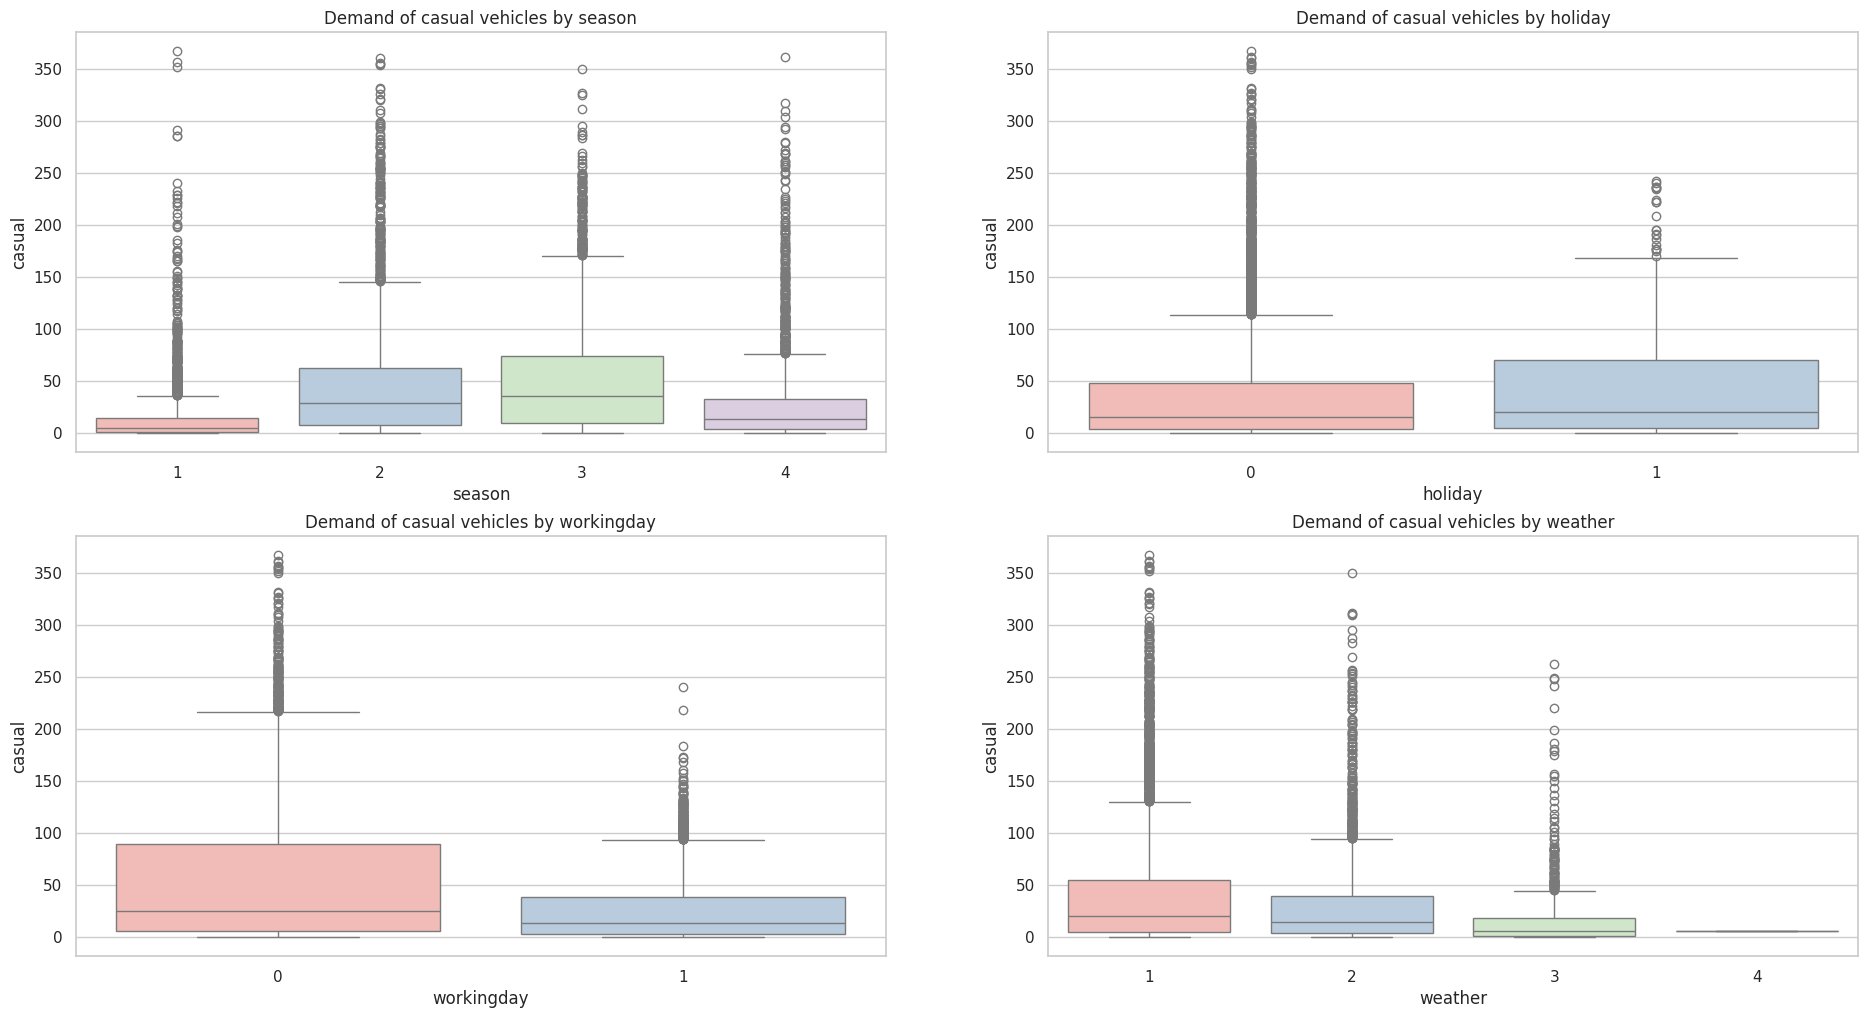

In [49]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

for index, column in enumerate(categorical_columns):
    sns.boxplot(data=df, x=column, y="casual", palette="Pastel1", ax=axes[index])
    axes[index].set_title(f"Demand of casual vehicles by {column}")

plt.show()

**Analysis**

**Season:**
* The median casual demand shows similar patterns in the summer and fall seasons, while it is notably lower in the spring and slightly higher in the winter.

* Outliers in casual demand are apparent across all seasons, with a likelihood of more outliers in spring and winter. All outliers are situated in the upper range of the Interquartile Range (IQR).

**Holiday:**
* The median casual demand for vehicles exhibits similarity during both holidays and non-holidays.

* Outliers are observed in casual demand for both holidays and non-holidays, primarily in the upper Interquartile Range (IQR).

**Working Day:**
* The median difference between a working day and a non-working day is only marginally significant.

* The distribution of casual demand on working days is smaller compared to non-working days.

* Outliers are present in vehicle demand for both working and non-working days.

**Weather:**
* For clear/few clouds and misty/cloudy conditions, the median demand for casual vehicles remains nearly identical.

* Casual vehicle demand during light snow/light rain is lower than during clear and mist conditions.

* There is only one data point for heavy rain and thunderstorms, which is expected, as it's less likely for people to prefer riding in such adverse weather conditions.

* Outliers are identified in the upper IQR for all weather conditions, excluding heavy rain.

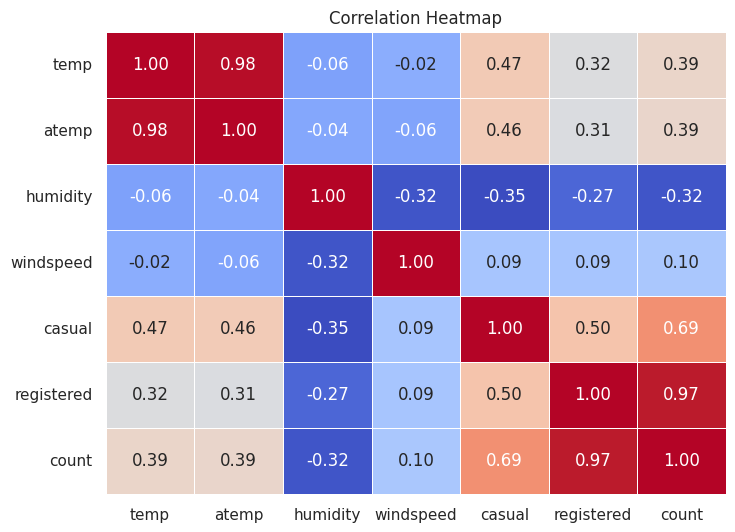

In [50]:
# Compute the correlation matrix
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

# Generate a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

**Analysis**

* There are no significant correlations observed among any combination of columns.
* There are no strong positive or negative correlations (0.7 - 0.9) between any pairs of columns.
* Moderate positive correlations (0.5 - 0.7) are present between the [casual, count] and [casual, registered] columns.
* Slight positive correlations (0.3 - 0.5) are noticeable among pairs such as [count, temp], [count, atemp], and [casual, atemp].
* A strong correlation (> 0.9) is evident between [atemp, temp] and [count, registered] columns.

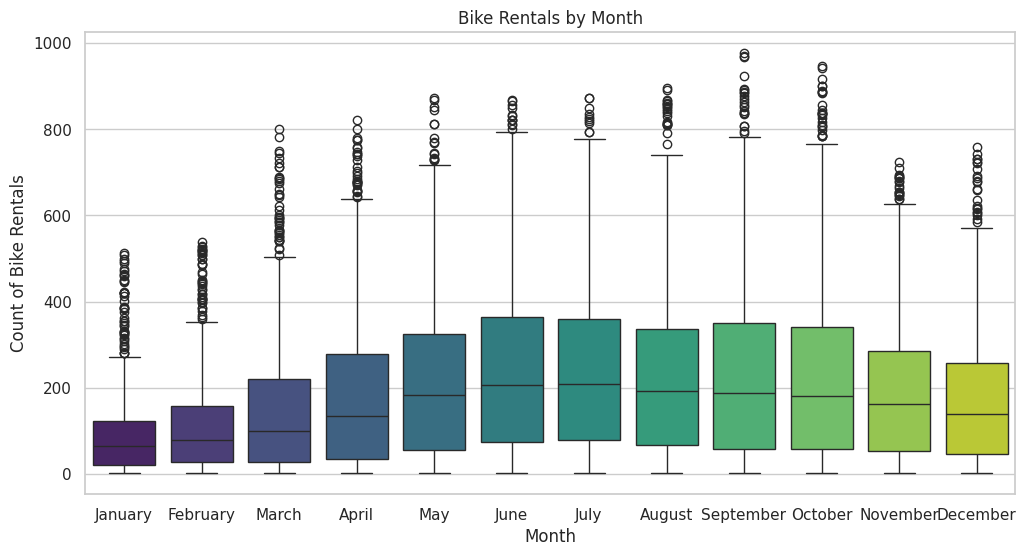

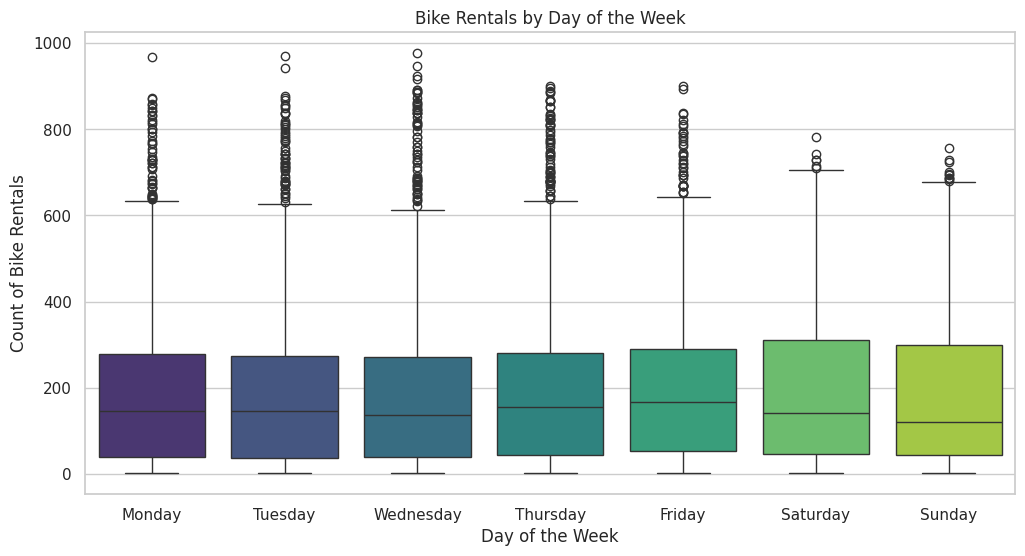

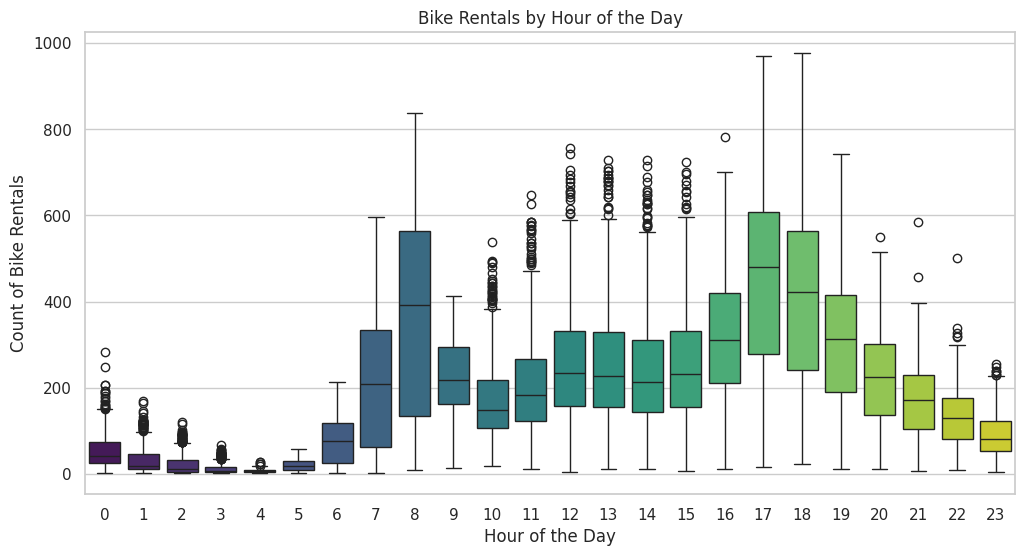

In [51]:
# Set the datetime column as the index
df.set_index('datetime', inplace=True)

# Extract features from datetime for analysis
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

# Map numerical month and day_of_week values to their names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Bivariate Analysis: Count of Bike Rentals by Month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='count', palette='viridis')
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Rentals')
plt.xticks(ticks=range(12), labels=[month_names[month] for month in range(1, 13)])
plt.show()

# Bivariate Analysis: Count of Bike Rentals by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_week', y='count', palette='viridis', order=range(7))
plt.title('Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Bike Rentals')
plt.xticks(ticks=range(7), labels=[day_names[day] for day in range(7)])
plt.show()

# Bivariate Analysis: Count of Bike Rentals by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='count', palette='viridis')
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Bike Rentals')
plt.show()

**Analysis**

**Bike Rentals by Month:**

* The median count of bike rentals is higher in the warmer months (e.g., May to September).
* The demand is relatively lower in the colder months (e.g., December to February).
* There are potential outliers in the demand during the warmer months, indicating occasional high-demand days.

**Bike Rentals by Day of the Week:**

* The median count of bike rentals is consistent across the days of the week.
* There is slightly higher demand on weekdays compared to weekends, with potential outliers on weekdays.
* Friday and Monday may experience higher demand compared to other weekdays.

**Bike Rentals by Hour of the Day:**

* The demand for bike rentals peaks during the morning (around 8 AM) and evening (around 5-6 PM) hours.
* There is a noticeable drop in demand during the night hours, with potential outliers indicating occasional high-demand periods.

#**Hypothesis Testing**
**2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

* Null Hypothesis (H0): There is no significant difference in the number of electric cycles rented on working days and non-working days.
* Alternative Hypothesis (H1): There is a significant difference in the number of electric cycles rented on working days and non-working days.
* The default alpha level (significance level) is  0.05.

**The t-test assumes:**

* Normality: Data within each group is roughly normally distributed.
Homogeneity of Variance: Variances of compared groups are approximately equal.
* Random Sampling: Data is collected randomly.
* Independence: Observations are independent.
* Scale of Measurement: Data is on an interval or ratio scale.

Shapiro-Wilk Test for Normality (Working Day):
Statistic: 0.8702582120895386, p-value: 0.0
The data is not normally distributed.
Shapiro-Wilk Test for Normality (Non-Working Day):
Statistic: 0.8852126598358154, p-value: 4.203895392974451e-45
The data is not normally distributed.

Levene's Test for Equal Variance:
Statistic: 0.004972848886504472, p-value: 0.9437823280916695
The variances are not significantly different.


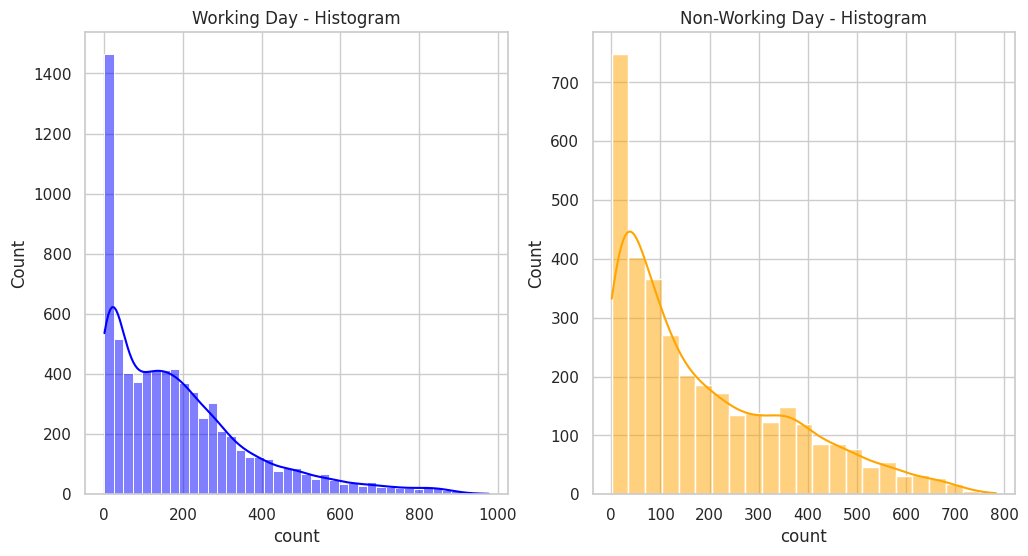

In [52]:
from scipy.stats import shapiro, levene

# Separate data into two groups based on working day
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Function to check normality assumption
def check_normality(data, group_name):
    stat, p_value = shapiro(data)
    print(f'Shapiro-Wilk Test for Normality ({group_name}):')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value < alpha:
        print('The data is not normally distributed.')
    else:
        print('The data appears to be normally distributed.')

# Function to check equal variance assumption
def check_equal_variance(group1, group2):
    stat, p_value = levene(group1, group2)
    print('\nLevene\'s Test for Equal Variance:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value < alpha:
        print('The variances are significantly different (rejecting the null hypothesis of homogeneity).')
    else:
        print('The variances are not significantly different.')

# Set alpha level
alpha = 0.05

# Check normality for both groups
check_normality(working_day, 'Working Day')
check_normality(non_working_day, 'Non-Working Day')

# Check equal variance
check_equal_variance(working_day, non_working_day)

# Visualize histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(working_day, kde=True, color='blue')
plt.title('Working Day - Histogram')

plt.subplot(1, 2, 2)
sns.histplot(non_working_day, kde=True, color='orange')
plt.title('Non-Working Day - Histogram')

plt.show()

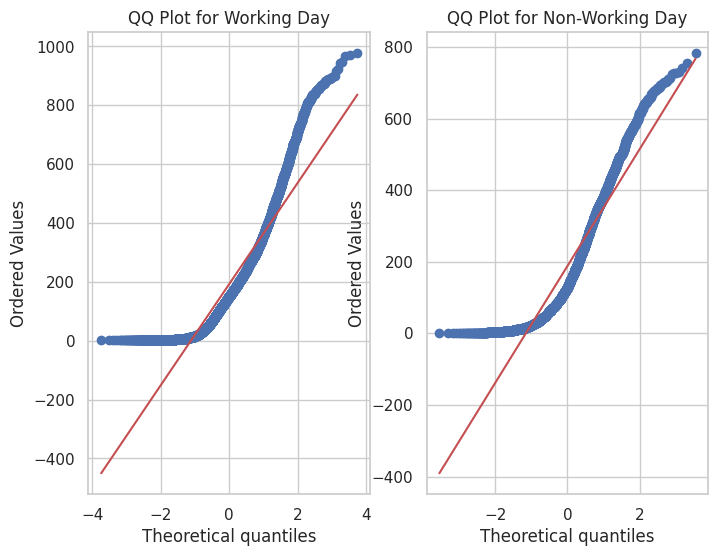

In [53]:
from scipy.stats import probplot

# Function to plot QQ plot
def qq_plot(ax, data, group_name):
    probplot(data, plot=ax)
    ax.set_title(f'QQ Plot for {group_name}')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Plot QQ plots for both groups
qq_plot(axes[0], working_day, 'Working Day')
qq_plot(axes[1], non_working_day, 'Non-Working Day')

plt.show()

**Analysis**
From the above plots it seems distributions do not follow normal distribution

In [54]:
from scipy.stats import ttest_ind

# Perform 2-sample t-test
t_stat, p_value = ttest_ind(working_day, non_working_day)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than the significance level (alpha) to make a decision
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in the number of electric cycles rented on working days and non-working days.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in the number of electric cycles rented on working days and non-working days.')

T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject the null hypothesis: There is no significant difference in the number of electric cycles rented on working days and non-working days.


**ANNOVA to check if No. of cycles rented is similar or different in different**
 1. weather  
 2. season

**Assumptions for ANOVA:**

* Homogeneity of Variances (Homoscedasticity): The variances within each group should be approximately equal.
* Normality: The residuals should be normally distributed.

**(a) if No. of cycles rented is similar or different in different weather**
* **Null Hypothesis (H0):** Weather has no effect on the number of rides booked.
* **Alternative Hypothesis (Ha)**: Weather affects the number of rides booked.
* **Alpha = 0.05**

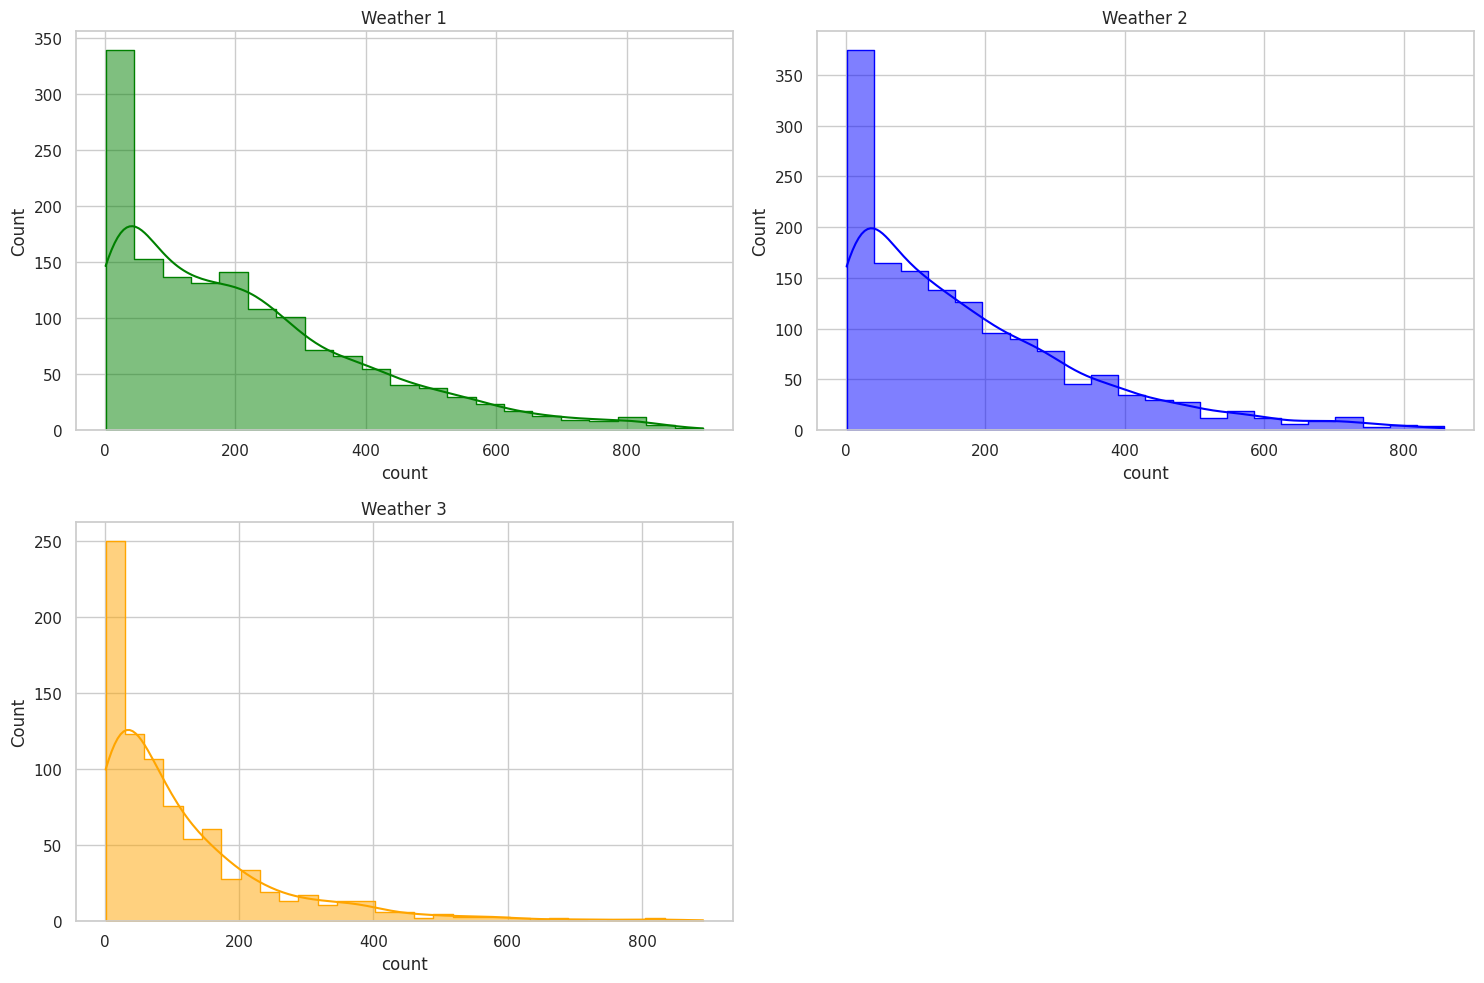

In [55]:
# Visual normality check for each weather condition using subplots
plt.figure(figsize=(15, 10))

# Creating subplots for each weather condition
plt.subplot(2, 2, 1)
# Histplot for Weather 1
sns.histplot(df.loc[df['weather'] == 1, 'count'].sample(min(1500, len(df[df['weather'] == 1]))), element='step', color='green', kde=True)
plt.title('Weather 1')

plt.subplot(2, 2, 2)
# Histplot for Weather 2
sns.histplot(df.loc[df['weather'] == 2, 'count'].sample(min(1500, len(df[df['weather'] == 2]))), element='step', color='blue', kde=True)
plt.title('Weather 2')

plt.subplot(2, 2, 3)
# Histplot for Weather 3
sns.histplot(df.loc[df['weather'] == 3, 'count'].sample(min(1500, len(df[df['weather'] == 3]))), element='step', color='orange', kde=True)
plt.title('Weather 3')

plt.tight_layout()
plt.show()

* (Excluding weather condition 4 due to having only one data point, and performing an ANOVA test with a single data point in a group is not feasible.)
* Given the right-skewed distribution in all three plots, it indicates that the data is not following a normal distribution. Therefore, conducting an ANOVA test directly is not appropriate.

**Homogeneity of Variances using Lavene's test**

In [56]:
# Checking for equal variance among different weather conditions with Levene's Test

# Null Hypothesis(H0): Variance among the groups is equal.
# Alternative Hypothesis(Ha): Variance among the groups is not equal.

group1 = df["count"][df["weather"] == 1]
group2 = df["count"][df["weather"] == 2]
group3 = df["count"][df["weather"] == 3]
group4 = df["count"][df["weather"] == 4]

levene_stat, p_value = levene(group1, group2, group3, group4)

alpha = 0.05
print(f"Levene test with Test Statistic: {levene_stat}, and p-value: {p_value}")

if p_value < alpha:
    print("Reject Ho: Variance among the groups is not equal")
else:
    print("Failed to reject Ho: Variance among the groups is equal")

Levene test with Test Statistic: 54.85106195954556, and p-value: 3.504937946833238e-35
Reject Ho: Variance among the groups is not equal


Since the assumptions of normality and homogeneity of variances were not met for the data representing the count of cycles rented in different weather conditions, the traditional one-way ANOVA cannot be reliably applied. Instead, we opt for the Kruskal-Wallis test, a non-parametric alternative suitable for situations where these assumptions are violated. The Kruskal-Wallis test assesses whether there is a significant difference in the distribution of cycle counts across various weather conditions, without relying on the assumptions that the data follows a normal distribution and that variances are equal among groups.


In [57]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for different weather conditions
kruskal_stat, p_value = kruskal(group1, group2, group3, group4)

alpha = 0.05
print(f"Kruskal-Wallis test with Test Statistic: {kruskal_stat}, and p-value: {p_value}")

if p_value < alpha:
    print("Reject Ho: There is a significant difference in the number of cycles rented among different weather conditions.")
else:
    print("Failed to reject Ho: There is no significant difference in the number of cycles rented among different weather conditions.")

Kruskal-Wallis test with Test Statistic: 205.00216514479087, and p-value: 3.501611300708679e-44
Reject Ho: There is a significant difference in the number of cycles rented among different weather conditions.


# **Box-Cox**
**Reason for Box-Cox Transformation:**
The Box-Cox transformation is applied to stabilize variance and make the data more closely approximate a normal distribution. By doing so, we aim to meet the assumptions required for performing an ANOVA test. This transformation is especially useful when dealing with count data that exhibits heteroscedasticity or violates the normality assumption. After transformation, the data can be more reliably analyzed using ANOVA.

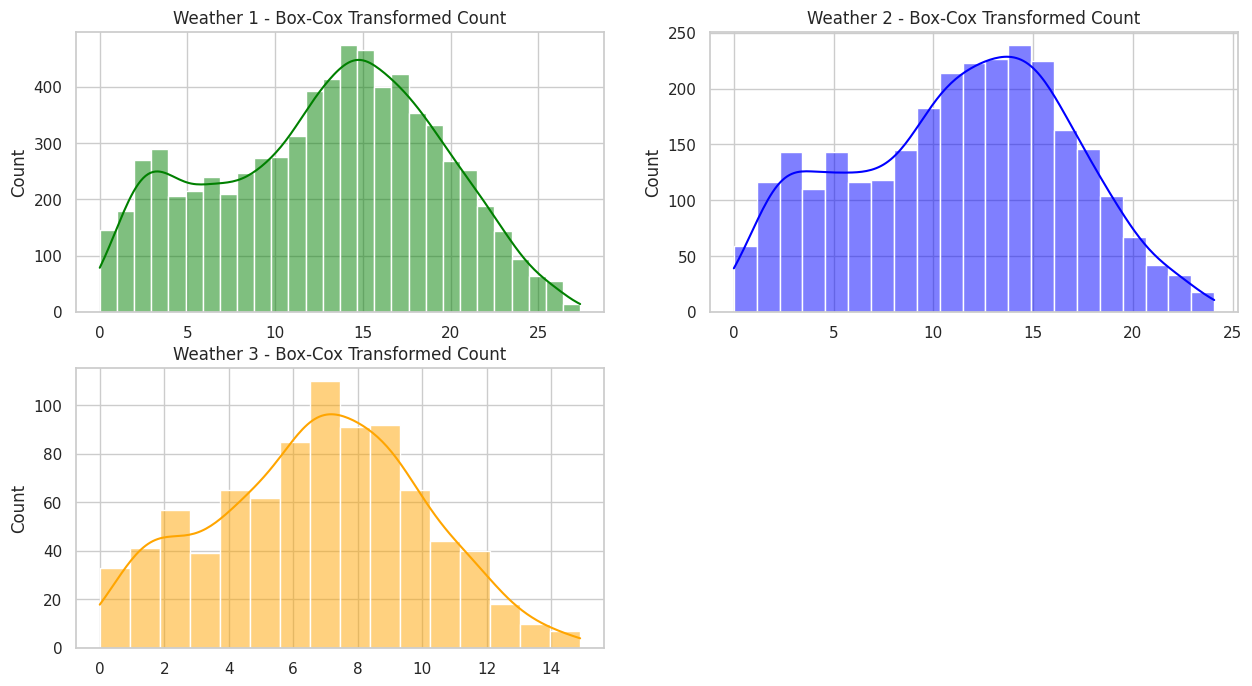

In [58]:
from scipy.stats import boxcox
from scipy.stats import f_oneway

# Exclude weather condition 4 since not much data
filtered_data = df[df['weather'] != 4]

# Apply Box-Cox transformation to counts of different weather conditions
transformed_count_weather1, lambda_value_weather1 = boxcox(filtered_data[filtered_data['weather'] == 1]['count'])
transformed_count_weather2, lambda_value_weather2 = boxcox(filtered_data[filtered_data['weather'] == 2]['count'])
transformed_count_weather3, lambda_value_weather3 = boxcox(filtered_data[filtered_data['weather'] == 3]['count'])

# Visualize the transformed data for each weather condition
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.histplot(transformed_count_weather1, kde=True, color='green')
plt.title('Weather 1 - Box-Cox Transformed Count')

plt.subplot(2, 2, 2)
sns.histplot(transformed_count_weather2, kde=True, color='blue')
plt.title('Weather 2 - Box-Cox Transformed Count')

plt.subplot(2, 2, 3)
sns.histplot(transformed_count_weather3, kde=True, color='orange')
plt.title('Weather 3 - Box-Cox Transformed Count')

plt.show()

**ANOVA (Analysis of Variance):**

**Null Hypothesis (H0):** The mean number of bike rentals is the same across different weather conditions.

**Alternative Hypothesis (H1):** There is a significant difference in the mean number of bike rentals across different weather conditions.

In [59]:
# Perform ANOVA for weather conditions
anova_stat, p_value_anova = f_oneway(transformed_count_weather1, transformed_count_weather2, transformed_count_weather3)

# Print the results
print(f'ANOVA Test Statistic: {anova_stat}')
print(f'P-value: {p_value_anova}')

# Set significance level
alpha_anova = 0.05

# Check if the p-value is less than the significance level to make a decision
if p_value_anova < alpha_anova:
    print('Reject the null hypothesis: There is a significant difference in the mean number of bike rentals across different weather conditions.')
else:
    print('Fail to reject the null hypothesis: The mean number of bike rentals is the same across different weather conditions.')

ANOVA Test Statistic: 431.79686015294686
P-value: 3.4867243611236345e-181
Reject the null hypothesis: There is a significant difference in the mean number of bike rentals across different weather conditions.


**(b) if No. of cycles rented is similar or different in different season**

**Null Hypothesis (H0):** There is no significant difference in the number of cycles rented across different seasons.

**Alternative Hypothesis (H1):** There is a significant difference in the number of cycles rented across different seasons.

**Alpha (Significance Level):** 0.05 (commonly used significance level)

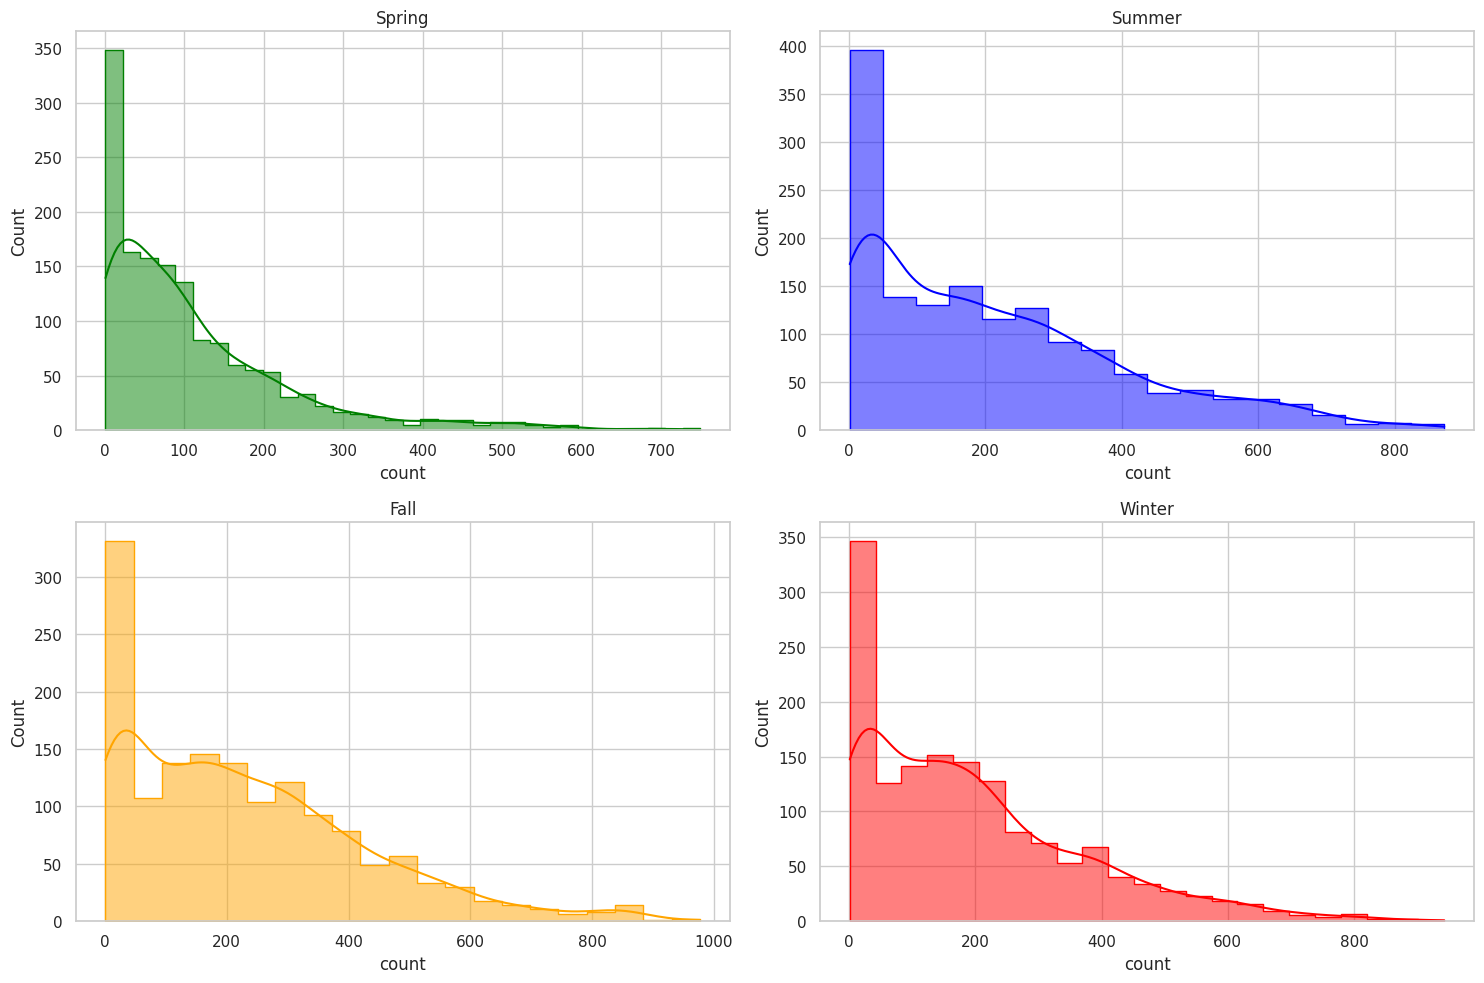

In [60]:
# Visual normality check for each season using subplots
plt.figure(figsize=(15, 10))

# Creating subplots for each season
plt.subplot(2, 2, 1)
# Histplot for Spring
sns.histplot(df.loc[df['season'] == 1, 'count'].sample(1500), element='step', color='green', kde=True)
plt.title('Spring')

plt.subplot(2, 2, 2)
# Histplot for Summer
sns.histplot(df.loc[df['season'] == 2, 'count'].sample(1500), element='step', color='blue', kde=True)
plt.title('Summer')

plt.subplot(2, 2, 3)
# Histplot for Fall
sns.histplot(df.loc[df['season'] == 3, 'count'].sample(1500), element='step', color='orange', kde=True)
plt.title('Fall')

plt.subplot(2, 2, 4)
# Histplot for Winter
sns.histplot(df.loc[df['season'] == 4, 'count'].sample(1500), element='step', color='red', kde=True)
plt.title('Winter')

plt.tight_layout()
plt.show()

**Conclusion**
As all four plots exhibit right skewness, indicating a non-normal distribution of the data, the direct application of the ANOVA test is not suitable.

**Homogeneity of Variances using Lavene's test**
* **Null Hypothesis (H0):** Variances among the groups are equal.
* **Alternative Hypothesis (Ha):** Variances among the groups are not equal.

In [61]:
# Extracting count data for each season
group1 = df["count"][df["season"]==1]
group2 = df["count"][df["season"]==2]
group3 = df["count"][df["season"]==3]
group4 = df["count"][df["season"]==4]

# Performing Levene's Test for homogeneity of variances
levene_stat, p_value = levene(group1, group2, group3, group4)

# Setting the significance level (alpha)
alpha = 0.05

# Printing hypotheses and Levene's test results
print("Null Hypothesis (H0): Variances among the groups are equal.")
print("Alternative Hypothesis (Ha): Variances among the groups are not equal.")
print("\nLevene test with Test Statistic: {}, and p-value: {}".format(levene_stat, p_value))

# Checking the p-value against the significance level
if p_value < alpha:
    print("Reject Ho: Variances among the groups are not equal")
else:
    print("Failed to reject Ho: Variances among the groups are equal")

Null Hypothesis (H0): Variances among the groups are equal.
Alternative Hypothesis (Ha): Variances among the groups are not equal.

Levene test with Test Statistic: 187.7706624026276, and p-value: 1.0147116860043298e-118
Reject Ho: Variances among the groups are not equal


Since the data is neither normal nor homogeneous, we perform the Kruskal-Wallis test .
* **Null Hypothesis (H0):** Season has no effect on the number of rides booked.
* **Alternative Hypothesis (Ha):** Season affects the number of rides booked.

In [62]:
from scipy.stats import kruskal

# Kruskal-Wallis Test
statistic, p_value = kruskal(group1, group2, group3, group4)

alpha = 0.05
print("Kruskal-Wallis Test Statistic: {}, p-value: {}".format(statistic, p_value))

if p_value < alpha:
    print("Reject Ho: Season significantly affects the number of rides booked.")
else:
    print("Failed to reject Ho: No significant effect of season on the number of rides booked.")

Kruskal-Wallis Test Statistic: 699.6668548181988, p-value: 2.479008372608633e-151
Reject Ho: Season significantly affects the number of rides booked.


**Box-Cox:**

Since the assumptions of normality and homogeneity of variances for ANOVA are not met, we'll apply the Box-Cox transformation to the counts of different seasons to stabilize variances and make the data more normal.

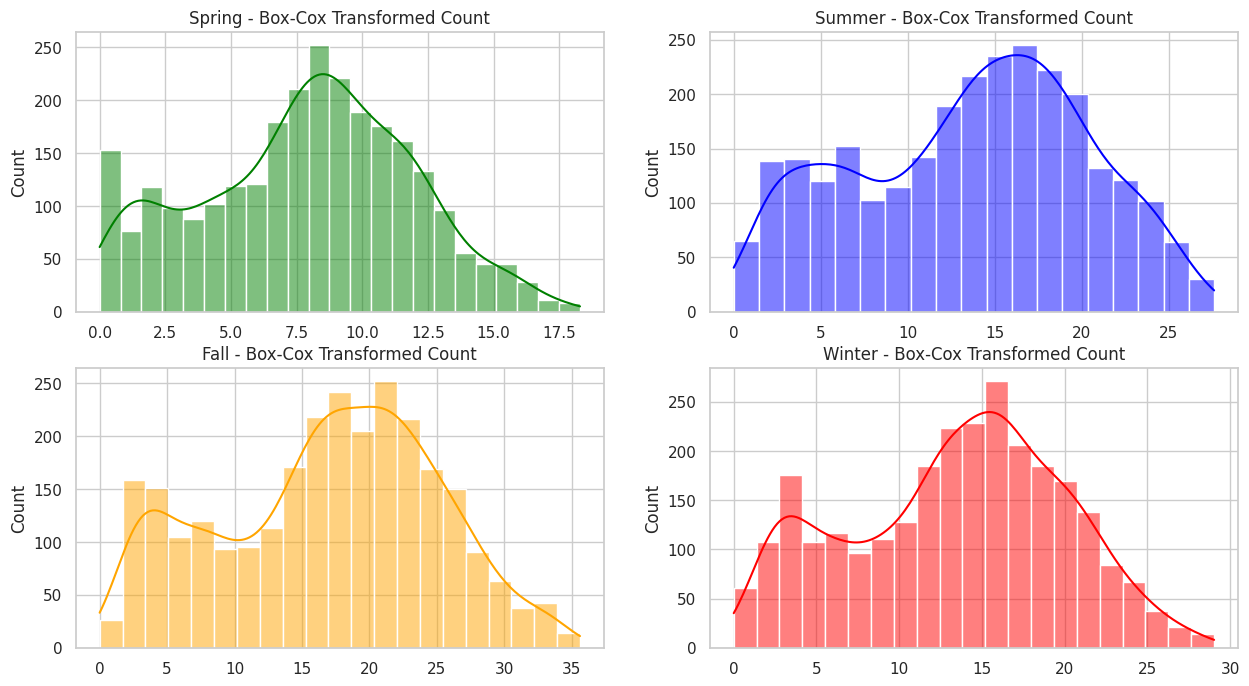

In [63]:
from scipy.stats import boxcox
from scipy.stats import f_oneway

# Apply Box-Cox transformation to counts of different seasons
transformed_count_spring, lambda_value_spring = boxcox(df[df['season'] == 1]['count'])
transformed_count_summer, lambda_value_summer = boxcox(df[df['season'] == 2]['count'])
transformed_count_fall, lambda_value_fall = boxcox(df[df['season'] == 3]['count'])
transformed_count_winter, lambda_value_winter = boxcox(df[df['season'] == 4]['count'])

# Visualize the transformed data for each season
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.histplot(transformed_count_spring, kde=True, color='green')
plt.title('Spring - Box-Cox Transformed Count')

plt.subplot(2, 2, 2)
sns.histplot(transformed_count_summer, kde=True, color='blue')
plt.title('Summer - Box-Cox Transformed Count')

plt.subplot(2, 2, 3)
sns.histplot(transformed_count_fall, kde=True, color='orange')
plt.title('Fall - Box-Cox Transformed Count')

plt.subplot(2, 2, 4)
sns.histplot(transformed_count_winter, kde=True, color='red')
plt.title('Winter - Box-Cox Transformed Count')

plt.show()

**Hypotheses for ANOVA:**

**Null Hypothesis (H0):** Season has no effect on the number of rides booked.

**Alternative Hypothesis (Ha):** Season affects the number of rides booked.

In [64]:
# Perform ANOVA on the transformed counts for different seasons
anova_result_seasons = f_oneway(transformed_count_spring, transformed_count_summer,
                                transformed_count_fall, transformed_count_winter)

# Print the ANOVA results for different seasons
print("ANOVA Results for Different Seasons:")
print(anova_result_seasons)

# Check if the p-value is less than the significance level (alpha) to make a decision
alpha = 0.05
if anova_result_seasons.pvalue < alpha:
    print('Reject the null hypothesis: Season significantly affects the number of rides booked.')
else:
    print('Fail to reject the null hypothesis: No significant effect of season on the number of rides booked.')

ANOVA Results for Different Seasons:
F_onewayResult(statistic=890.4936156746095, pvalue=0.0)
Reject the null hypothesis: Season significantly affects the number of rides booked.


**Chi-square test to check if Weather is dependent on the season**

**Note:** A commonly cited guideline asserts that the chi-square test is appropriate when both observed and expected frequencies in each cell are at least 5.

**Assumptions:**

* Data in cells should represent frequencies or counts, not percentages or other transformations.
* Levels (or categories) of variables are mutually exclusive.
* Study groups must be independent; if not, a different test is required.
* At least 80% of cells should have expected values of 5 or more, with none below one.

**Null Hypothesis:H0:** The impact of weather is independent of seasons.

**Alternative Hypothesis:Ha:** The impact of weather varies depending on the season..

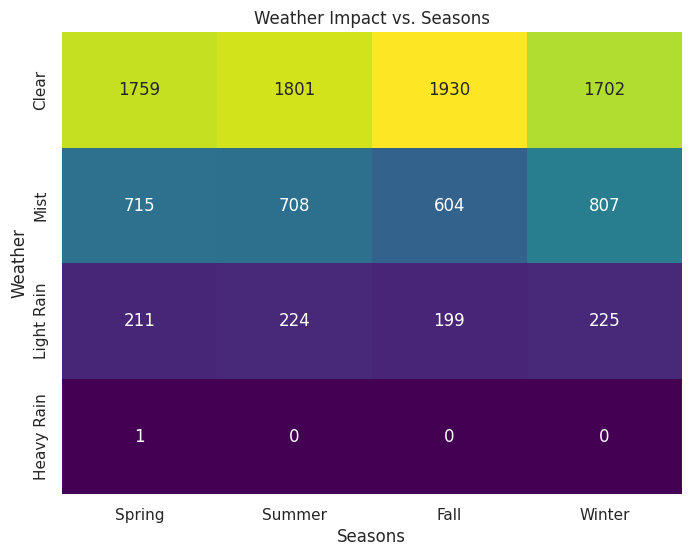

In [65]:
# Mapping numerical codes to actual names for better visualization
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Replace numerical codes with names in the DataFrame
df['weather_name'] = df['weather'].map(weather_mapping)
df['season_name'] = df['season'].map(season_mapping)

# Create a contingency table
contingency_table = pd.crosstab(df['weather_name'], df['season_name'])

# Plot the contingency table with names
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', cbar=False)
plt.title('Weather Impact vs. Seasons')
plt.xlabel('Seasons')
plt.ylabel('Weather')
plt.show()

In [66]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['weather'], df['season'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check the p-value against the significance level
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis: Weather impact is dependent on seasons.')
else:
    print('Fail to reject the null hypothesis: Weather impact is independent of seasons.')

Chi-square Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07
Reject the null hypothesis: Weather impact is dependent on seasons.


# **Key Insights:**

**Seasonal Demand Patterns:**

* Peak demand is observed during spring and summer, with a noticeable dip in fall and the lowest demand in winter.
* Tailor marketing efforts and inventory management to accommodate these seasonal variations.

**Hourly and Daily Rental Trends:**

* Bike rentals show distinct patterns throughout the day, with low counts in the early morning, peaks during morning and evening rush hours, and a gradual decline at night.
* Consider targeted promotions during peak hours and explore partnerships with businesses around commute times.

**Monthly Usage Dynamics:**

* Warmer months, from May to September, experience higher demand for bike rentals.
* Optimize inventory and explore partnerships to meet increased demand during these months.

**Weather Influence on Demand:**

* Clear and cloudy weather conditions significantly impact rental demand.
* Implement weather-based promotions during favorable conditions and conduct further analysis for extreme weather scenarios.

**User Demographics and Preferences:**

* Majority of rentals occur on weekdays, emphasizing the importance of time-based pricing strategies.
* Consider user preferences for temperature ranges when planning promotions.

**Extreme Weather Considerations:**

* Limited data for extreme weather conditions necessitates additional analysis to understand specific impacts on demand.

**Temperature, Humidity, and Windspeed Factors:**

* Temperature remains below 28 degrees Celsius for the majority of the time.
* Humidity levels are typically higher than 40% for over 80% of recorded instances.
* Windspeed is generally less than 20, indicating favorable conditions for bike rentals.

**Weather Type Distribution:**

* Clear or cloudy weather attracts the most bike rentals, followed by misty conditions and light snow or rain. Limited data for heavy rain or snow.
* Develop promotions based on weather conditions to optimize demand.

**Statistical Tests and Correlations:**

* The 2-sample T-test shows that the average bike rental counts are similar on both working and non-working days. The ANOVA test reveals that the average rental counts vary across different seasons. Additionally, the Chi-square test indicates that weather is influenced by the season.

#**Recommendations:**

**1. Flexible Pricing Models:**

Introduce flexible hourly pricing to balance demand during peak and off-peak hours.
Incentivize customers to opt for rentals during quieter intervals.

**2. Seasonal Marketing Strategies:**

Maintain a larger inventory of bikes during high-demand seasons (spring and summer).
Tailor marketing campaigns to promote rentals during specific seasons.

**3. Weather-Based Promotions:**

Implement weather-dependent discounts to attract customers during clear and cloudy conditions.
Explore promotions for misty conditions and assess opportunities for extreme weather scenarios.

**4. Peak Ride Time Strategies:**

Explore partnerships with organizations for promotions during morning and evening rush hours.
Incentivize rides during commute times to optimize vehicle usage.

**5. Inventory Management:**

Evaluate rental demand trends across months and adjust inventory accordingly.
Streamline inventory during months of reduced rental activity to prevent overstocking.

**6. Maintenance and Service Optimization:**

Prioritize comprehensive maintenance assessments before high-demand seasons.
Implement regular inspections and servicing to enhance customer experience.

**7. Customer Engagement:**

Encourage customer feedback for continuous improvement.
Consider personalized promotions based on user preferences.